#overview
##Dataset
In this project, the Dataset used is the famous berkeley earth [Kaggle Dataset](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data) for historic global temperature.
we will be using "
GlobalLandTemperaturesByCity.csv" file from it. We will be focussing on German city Jena for temperature forcasting

##Exploratory Data Analysis
First we use pandas to read the CSV file. After that we perform Data Cleaning such as removing unwanted columns, identifying and filling the missing values.

##Checking Time Series Data Stationarity:
This is achieved using Augmented Dickey-Fuller test which assists finding out the stationary properties in the Time series data.

The stationarity check is carried out using the plot and p-value is tested.

##Modelling and Forecasting Temperature
I used ARIMA model which stands for "Auto-Regressive Integrated Moving Averages".

In this case as the data is stationary therefore only AR and MA have been taken into account.

Then AIC is calculated and then I found values of p and q having lowest AIC where the p represents the number of Auto-Regressive (AR) terms and q represents the number of Moving Averages (MA) terms.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [0]:
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv', delimiter
                 =',')

In [5]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [0]:
df_country = df.Country.unique()

In [9]:
len(df_country)

243

In [0]:
df_Germany = df.drop('AverageTemperatureUncertainty', axis=1)

now we only select orbservations where country is Germany

In [0]:
df_Germany = df_Germany[df_Germany.Country == 'Germany']

In [14]:
df_Germany

,dt,AverageTemperature,Country
201440,1743-11-01,5.468,Germany
201441,1743-12-01,NaN,Germany
201442,1744-01-01,NaN,Germany
201443,1744-02-01,NaN,Germany
201444,1744-03-01,NaN,Germany
...,...,...,...
204674,2013-05-01,12.151,Germany
204675,2013-06-01,15.927,Germany
204676,2013-07-01,19.762,Germany
204677,2013-08-01,18.233,Germany


In [0]:
df_Germany = df_Germany.drop('Country', axis=1)

In [17]:
df_Germany

,dt,AverageTemperature
201440,1743-11-01,5.468
201441,1743-12-01,NaN
201442,1744-01-01,NaN
201443,1744-02-01,NaN
201444,1744-03-01,NaN
...,...,...
204674,2013-05-01,12.151
204675,2013-06-01,15.927
204676,2013-07-01,19.762
204677,2013-08-01,18.233


now we convert convert datetime column to index using to_datetime function in pandas

In [0]:
df_Germany.index = pd.to_datetime(df_Germany.dt)

In [19]:
df_Germany

,dt,AverageTemperature
dt,,
1743-11-01,1743-11-01,5.468
1743-12-01,1743-12-01,NaN
1744-01-01,1744-01-01,NaN
1744-02-01,1744-02-01,NaN
1744-03-01,1744-03-01,NaN
...,...,...
2013-05-01,2013-05-01,12.151
2013-06-01,2013-06-01,15.927
2013-07-01,2013-07-01,19.762


we can drop the datetime cloumn for now

In [0]:
df_Germany = df_Germany.drop('dt', axis=1)

In [21]:
df_Germany

,AverageTemperature
dt,
1743-11-01,5.468
1743-12-01,NaN
1744-01-01,NaN
1744-02-01,NaN
1744-03-01,NaN
...,...
2013-05-01,12.151
2013-06-01,15.927
2013-07-01,19.762


In [0]:
# Filtering data starting from 1970-01-01
df_Germany = df_Germany.loc['1970-01-01':]

In [23]:
df_Germany.head()

,AverageTemperature
dt,
1970-01-01,-2.721
1970-02-01,-1.331
1970-03-01,1.234
1970-04-01,5.512
1970-05-01,11.665


In [24]:
# Testing whether there are null values
df_Germany[df_Germany.isnull()]

,AverageTemperature
dt,
1970-01-01,NaN
1970-02-01,NaN
1970-03-01,NaN
1970-04-01,NaN
1970-05-01,NaN
...,...
2013-05-01,NaN
2013-06-01,NaN
2013-07-01,NaN


checking for null values

In [25]:
len(df_Germany[df_Germany.isnull()])

525

In [0]:
df_Germany = df_Germany.sort_index()

In [27]:
df_Germany.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='dt', length=525, freq=None)

In [0]:
#Replcing NaN values with the previous effective data
df_Germany.AverageTemperature.fillna(method='pad', inplace=True)

again checing for any null values

In [30]:
df_Germany[df_Germany.AverageTemperature.isnull()]

,AverageTemperature
dt,


In [31]:
df_Germany.describe()

,AverageTemperature
count,525.000000
mean,8.895307
std,6.695429
min,-6.281000
25%,3.306000
50%,8.417000
75%,15.011000
max,22.343000


adding ticks as another column


In [0]:
df_Germany['Ticks']= range(0, len(df_Germany.index.values))

In [34]:
df_Germany.head()

,AverageTemperature,Ticks
dt,,
1970-01-01,-2.721,0
1970-02-01,-1.331,1
1970-03-01,1.234,2
1970-04-01,5.512,3
1970-05-01,11.665,4


In [35]:
df_Germany.tail()

,AverageTemperature,Ticks
dt,,
2013-05-01,12.151,520
2013-06-01,15.927,521
2013-07-01,19.762,522
2013-08-01,18.233,523
2013-09-01,18.233,524


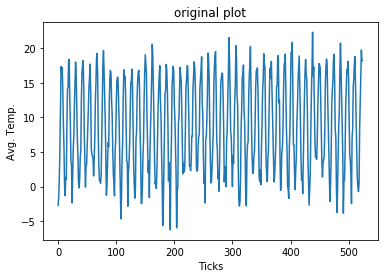

In [36]:
#very simple plotting
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Avg. Temp.')
ax1.set_title('original plot')
ax1.plot('Ticks', 'AverageTemperature', data=df_Germany);

In [37]:
df_Germany

,AverageTemperature,Ticks
dt,,
1970-01-01,-2.721,0
1970-02-01,-1.331,1
1970-03-01,1.234,2
1970-04-01,5.512,3
1970-05-01,11.665,4
...,...,...
2013-05-01,12.151,520
2013-06-01,15.927,521
2013-07-01,19.762,522


Now applying Augmented Dickey-Fuller test 

In [0]:
from statsmodels.tsa.stattools import adfuller
def stationarity_check(ts):
    
    # Determing rolling statistics
    roll_mean = ts.rolling( window=12).mean()
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    print("type of df_test: ",type(df_test))
    print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


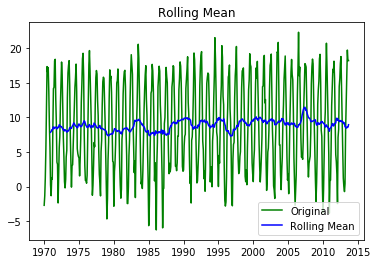

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-4.2711984300661205, 0.0004980878075374166, 16, 508, {'1%': -3.44328828958775, '5%': -2.8672462791357867, '10%': -2.569809231353463}, 2060.5638228165117)
df_output: 
 Test Statistic                  -4.271198
p-value                          0.000498
#Lags Used                      16.000000
Number of Observations Used    508.000000
dtype: float64
Test Statistic                  -4.271198
p-value                          0.000498
#Lags Used                      16.000000
Number of Observations Used    508.000000
Critical Value (1%)             -3.443288
Critical Value (5%)             -2.867246
Critical Value (10%)            -2.569809
dtype: float64


In [41]:
stationarity_check(df_Germany.AverageTemperature)


In [0]:
df_Germany['Roll_Mean'] = df_Germany.AverageTemperature.rolling( window=12).mean()

In [45]:
df_Germany.head()

,AverageTemperature,Ticks,Roll_Mean
dt,,,
1970-01-01,-2.721,0,NaN
1970-02-01,-1.331,1,NaN
1970-03-01,1.234,2,NaN
1970-04-01,5.512,3,NaN
1970-05-01,11.665,4,NaN


In [0]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

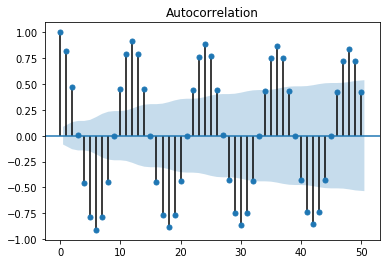

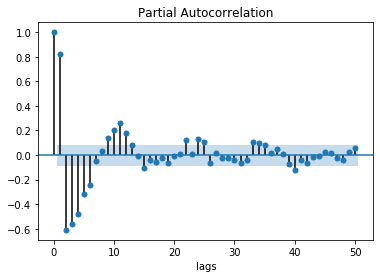

In [47]:
plot_acf(df_Germany.AverageTemperature, lags=50)
plot_pacf(df_Germany.AverageTemperature, lags=50)
plt.xlabel('lags')
plt.show()

In [0]:
from statsmodels.tsa.arima_model import ARMA

In [49]:
import itertools
p = q = range(0, 4)
pq = itertools.product(p, q)
for param in pq:
    try:
        mod = ARMA(df_Germany.AverageTemperature,order=param)
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(0, 0) - AIC:3489.3808038198003
ARMA(0, 1) - AIC:3055.991615279604
ARMA(0, 3) - AIC:2737.8610808445
ARMA(1, 0) - AIC:2902.00000842995


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(1, 1) - AIC:2794.013184224461


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(1, 2) - AIC:3051.0480389761133


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(1, 3) - AIC:2852.213870733134
ARMA(2, 0) - AIC:2655.374533034541


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(2, 2) - AIC:2118.3345331690507


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


ARMA(2, 3) - AIC:2099.618136694451


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(3, 0) - AIC:2463.25967769407


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(3, 2) - AIC:2097.228734488674


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARMA(3, 3) - AIC:2118.206761935702


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


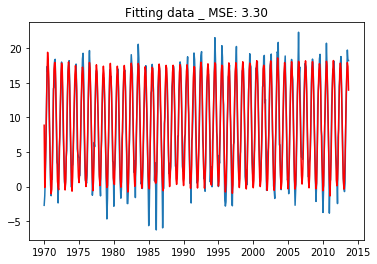

In [50]:
model = ARMA(df_Germany.AverageTemperature, order=(2,3))  
results_MA = model.fit()  
plt.plot(df_Germany.AverageTemperature)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('Fitting data _ MSE: %.2f'% (((results_MA.fittedvalues-df_Germany.AverageTemperature)**2).mean()))
plt.show()

In [0]:
predictions = results_MA.predict('01/01/1970', '12/01/2023')


In [52]:
predictions


1970-01-01     8.875416
1970-02-01    -0.138140
1970-03-01     2.498295
1970-04-01     6.384095
1970-05-01    11.267305
                ...    
2023-08-01    16.943789
2023-09-01    13.738183
2023-10-01     9.229324
2023-11-01     4.625755
2023-12-01     1.161365
Freq: MS, Length: 648, dtype: float64